In [1]:
import matplotlib.pyplot as plt
import numpy as np

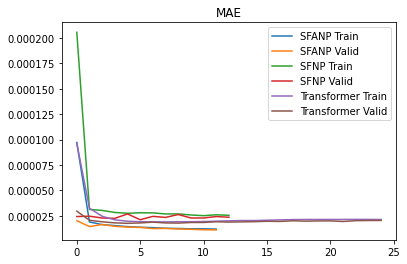

In [2]:
SFANP_train = np.load("metrics/train_MAE_SFANP.npy")
SFANP_valid = np.load("metrics/valid_MAE_SFANP.npy")
SFNP_train = np.load("metrics/train_MAE_SFNP.npy")
SFNP_valid = np.load("metrics/valid_MAE_SFNP.npy")
transformer_train = np.load("metrics/train_MAE_transformer.npy")
transformer_valid = np.load("metrics/valid_MAE_transformer.npy")


plt.plot(SFANP_train, label="SFANP Train")
plt.plot(SFANP_valid, label="SFANP Valid")
plt.plot(SFNP_train, label="SFNP Train")
plt.plot(SFNP_valid, label="SFNP Valid")
plt.plot(transformer_train, label="Transformer Train")
plt.plot(transformer_valid, label="Transformer Valid")
# plt.yscale("log")
plt.legend()
plt.title("MAE")
# plt.savefig("plots/log_loss_MAE.jpg")
plt.savefig("plots/loss_MAE.jpg")
plt.show()


In [3]:
mf_mae = np.load("aziz_metrics/MAE_MF.npy")
sf_mae = np.load("aziz_metrics/MAE_SF.npy")
max_y_a = np.load("aziz_metrics/max_abs_yH.npy")
max_y_test_a = np.load("aziz_metrics/max_abs_yH_test.npy")
mf_r = np.load("aziz_metrics/r2_MF.npy")
sf_r = np.load("aziz_metrics/r2_SF.npy")

SFNP_r = np.load("metrics/r2_SFNP.npy")
SFNP_mae = np.load("metrics/MAE_SFNP.npy")
SFNP_nmae = np.load("metrics/NMAE_SFNP.npy")
transformer_r = np.load("metrics/r2_transformer.npy")
transformer_mae = np.load("metrics/MAE_transformer.npy")
transformer_nmae = np.load("metrics/NMAE_transformer.npy")
SFANP_r = np.load("metrics/r2_SFANP.npy")
SFANP_mae = np.load("metrics/MAE_SFANP.npy")
SFANP_nmae = np.load("metrics/NMAE_SFANP.npy")


n = np.arange(26)

In [4]:
max_y_test_a

array([[1.3648986e-04, 1.2180752e-04, 8.1422593e-05, 5.3049724e-05,
        2.9617309e-04, 6.8489072e-04, 4.9460093e-03, 2.0184496e-03,
        1.2675985e-03, 1.0486773e-03, 1.0283745e-03, 1.4409468e-03,
        2.9928673e-03, 3.5183546e-03, 1.9223870e-03, 2.3610517e-03,
        2.6823340e-03, 1.8709819e-03, 1.9000922e-03, 1.8244425e-03,
        1.4967346e-03, 1.2576802e-03, 1.4032321e-03, 1.3872613e-03,
        1.8263414e-03, 4.5262654e-03]], dtype=float32)

In [5]:
max_y_a

array([1.3736301e-04, 1.2051052e-04, 8.5025364e-05, 5.3490534e-05,
       3.2384237e-04, 9.2129176e-04, 4.9265460e-03, 3.7203387e-03,
       1.4583078e-03, 1.4028084e-03, 1.8278249e-03, 1.8332164e-03,
       3.2604048e-03, 2.9853906e-03, 2.7891456e-03, 3.3010016e-03,
       2.6822577e-03, 2.5500911e-03, 2.7217101e-03, 2.2073365e-03,
       1.6138034e-03, 1.2971327e-03, 1.6585795e-03, 2.8129579e-03,
       3.7923008e-03, 5.1300386e-03], dtype=float32)

In [6]:
import dill
import datetime
import glob
from tqdm import tqdm
scaler = dill.load(open("../scalers/y_SPCAM5_minmax_scaler.dill", "rb"))
def sort_fn(filename):
    date_string = filename[-14:-4]
    datetime_object = datetime.datetime.strptime(date_string, "%Y-%m-%d")
    return datetime_object

In [7]:
l2_x_data = sorted(
    glob.glob(f"../data/SPCAM5/inputs_*"), key=sort_fn)
l2_y_data = sorted(
    glob.glob(f"../data/SPCAM5/outputs_*"), key=sort_fn)

split_n = int(365)
l2_x_train = l2_x_data[:split_n]
l2_y_train = l2_y_data[:split_n]

In [16]:
max_x = 0
max_y = 0

for x_path, y_path in tqdm(zip(l2_x_train, l2_y_train), total=len(l2_y_train)):
    x = np.load(x_path, mmap_mode="r")
    y = np.load(y_path, mmap_mode="r")
    max_x = np.maximum(max_x, np.max(np.abs(x), 0))
    max_y = np.maximum(max_y, np.max(np.abs(y), 0))

100%|██████████| 365/365 [01:17<00:00,  4.69it/s]


In [33]:
max_x_test = 0
max_y_test = 0

for x_path, y_path in tqdm(zip(l2_x_data[365:], l2_y_data[365:]), total=len(l2_y_data[365:])):
    x = np.load(x_path, mmap_mode="r")
    y = np.load(y_path, mmap_mode="r")
    max_x_test = np.maximum(max_x_test, np.max(np.abs(x), 0))
    max_y_test = np.maximum(max_y_test, np.max(np.abs(y), 0))


100%|██████████| 362/362 [01:11<00:00,  5.03it/s]


In [9]:
max_x_all = 0
max_y_all = 0

for x_path, y_path in tqdm(zip(l2_x_data, l2_y_data), total=len(l2_y_data)):
    x = np.load(x_path, mmap_mode="r")
    y = np.load(y_path, mmap_mode="r")
    max_x_all = np.maximum(max_x_all, np.max(np.abs(x), 0))
    max_y_all = np.maximum(max_y_all, np.max(np.abs(y), 0))

100%|██████████| 727/727 [03:08<00:00,  3.86it/s]


In [41]:
max_y_test_a == max_y_test[:26]

array([[ True,  True, False,  True, False, False,  True, False, False,
        False, False, False,  True,  True, False, False,  True, False,
        False, False,  True,  True, False, False, False, False]])

In [23]:
max_y[:26] == max_y_a

array([ True, False,  True,  True, False, False, False, False,  True,
        True, False,  True,  True,  True,  True,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True])

In [21]:
np.save("../scalers/max_abs_yH.npy", max_y)

In [22]:
max_y

array([1.37363008e-04, 1.19730634e-04, 8.50253637e-05, 5.34905339e-05,
       2.83338770e-04, 4.07274027e-04, 1.70546642e-03, 2.62628333e-03,
       1.45830784e-03, 1.40280835e-03, 1.47457549e-03, 1.83321640e-03,
       3.26040480e-03, 2.98539060e-03, 2.78914557e-03, 3.30100162e-03,
       2.36784201e-03, 2.48307968e-03, 2.72171013e-03, 2.04076129e-03,
       1.61380344e-03, 1.29713269e-03, 1.65857945e-03, 2.81295786e-03,
       3.79230082e-03, 5.13003860e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.17881852e-08, 2.01659223e-08,
       6.94762381e-09, 7.21283078e-09, 6.41689590e-09, 1.25875950e-08,
       2.87325665e-08, 4.19430322e-08, 9.33785600e-08, 1.79494577e-07,
       3.22516968e-07, 4.91698472e-07, 6.10688630e-07, 6.50288769e-07,
       8.18230433e-07, 1.02346075e-06, 1.62278639e-06, 1.52542873e-06,
       1.71328895e-06, 2.11697625e-06, 2.28136219e-06, 4.58889417e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

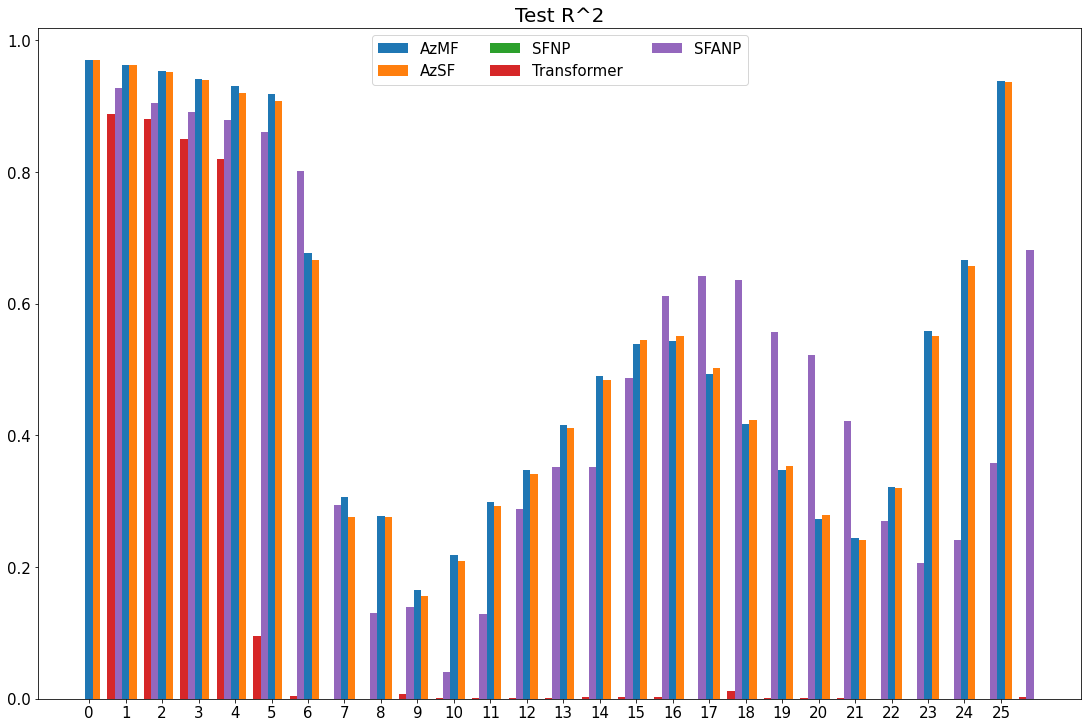

In [10]:
fig, ax = plt.subplots(layout='constrained', figsize=(15, 10))
all_rs = [mf_r, sf_r, SFNP_r, transformer_r, SFANP_r]
labels = ["AzMF", "AzSF", "SFNP", "Transformer", "SFANP"]
width = 1 / len(labels)
multiplier = 0

for i in range(len(labels)):
    offset = width * multiplier
    rects = ax.bar(n + offset, all_rs[i], width, label=labels[i])
    multiplier += 1


ax.legend(loc='upper center', ncols=3, prop={'size': 15})
plt.title("Test R^2", fontsize=20)
plt.xticks(np.arange(26), fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("plots/MASTER_R2.jpg")
plt.show()


<BarContainer object of 26 artists>

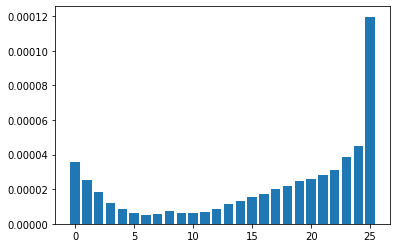

In [31]:
plt.bar(n, SFNP_mae)

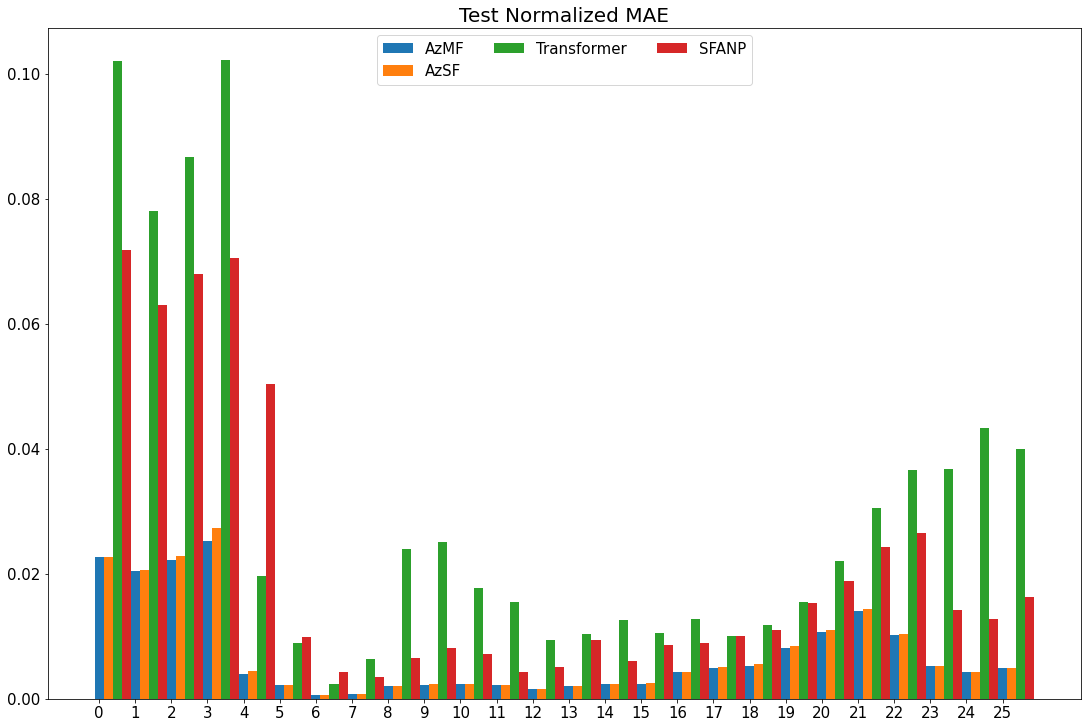

In [6]:

fig, ax = plt.subplots(layout='constrained', figsize=(15, 10))
all_rs = [mf_mae, sf_mae, transformer_nmae, SFANP_nmae]
labels = ["AzMF", "AzSF", "Transformer", "SFANP"]
width = 1 / len(labels)
multiplier = 0

for i in range(len(labels)):
    offset = width * multiplier
    rects = ax.bar(n + offset, all_rs[i], width, label=labels[i])
    multiplier += 1


ax.legend(loc='upper center', ncols=3, prop={'size': 15})
plt.title("Test Normalized MAE", fontsize=20)
plt.xticks(np.arange(26), fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("plots/MASTER_MAE.jpg")
plt.show()


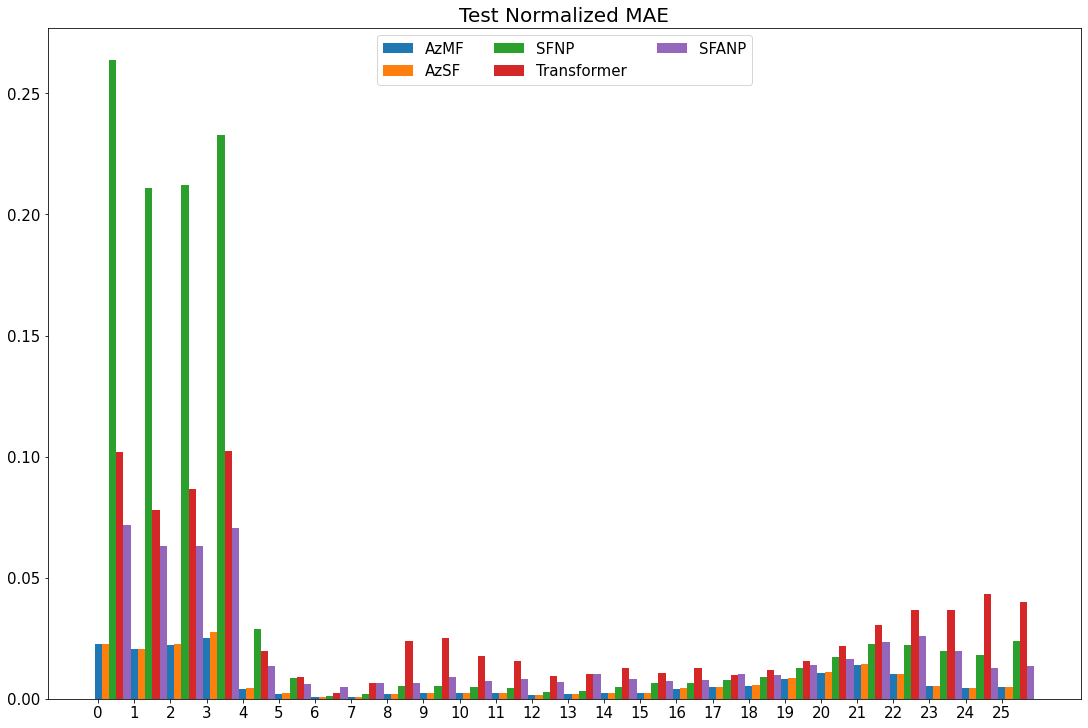

In [42]:

fig, ax = plt.subplots(layout='constrained', figsize=(15, 10))
all_rs = [mf_mae, sf_mae, SFNP_nmae, transformer_nmae, SFANP_nmae]
labels = ["AzMF", "AzSF", "SFNP", "Transformer", "SFANP"]
width = 1 / len(labels)
multiplier = 0

for i in range(len(labels)):
    offset = width * multiplier
    rects = ax.bar(n + offset, all_rs[i], width, label=labels[i])
    multiplier += 1


ax.legend(loc='upper center', ncols=3, prop={'size': 15})
plt.title("Test Normalized MAE", fontsize=20)
plt.xticks(np.arange(26), fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("plots/MASTER_OUTLIER_MAE.jpg")
plt.show()


In [ ]:
import matplotlib.pyplot as plt

In [6]:
def plot_bar(title, metrics, labels):
    x = np.arange(26)  # the label locations

    fig, ax = plt.subplots(constrained_layout=True)
    width = 1 / len(metrics)  # the width of the bars
    multiplier = 0
    for i in range(len(metrics)):
        offset = width * multiplier
        ax.bar(x + offset, metrics[i], width, label=labels[i])
        multiplier += 1
    plt.legend(loc="upper right")
a
    plt.suptitle(title)
    plt.savefig(f"{save_path}/{title}.jpeg")
    plt.show()

In [7]:
all_rs = [sfnp_test_r, transformer_test_r, sf_attn_test_r]
all_maes = [sfnp_test_non_mae, transformer_test_non_mae, sf_attn_test_non_mae]
all_nmaes = [sfnp_test_nmae, transformer_test_nmae, sf_attn_test_nmae]

labels = ["SFNP", "Transformer", "SF-Attn"]

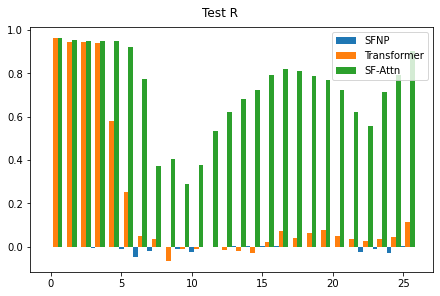

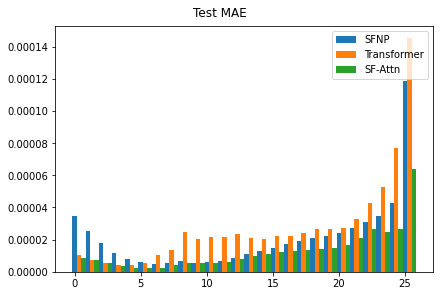

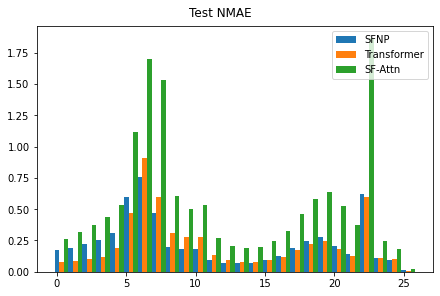

In [8]:
plot_bar("Test R", all_rs, labels)
plot_bar("Test MAE", all_maes, labels)
plot_bar("Test NMAE", all_nmaes, labels)